## Movie Recommendation system

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
import sklearn

In [4]:
from sklearn.preprocessing import MultiLabelBinarizer,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
import ast

In [6]:
from sklearn.metrics import silhouette_score

In [7]:
data=pd.read_csv(r"C:\Users\Administrator\Desktop\movies_metadata.csv",low_memory=False)

In [8]:
data.head()

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [9]:
data.shape

(45466, 24)

In [12]:
data.describe() # low_memory=False

revenue       runtime  vote_average    vote_count
count  4.546000e+04  45203.000000  45460.000000  45460.000000
mean   1.120935e+07     94.128199      5.618207    109.897338
std    6.433225e+07     38.407810      1.924216    491.310374
min    0.000000e+00      0.000000      0.000000      0.000000
25%    0.000000e+00     85.000000      5.000000      3.000000
50%    0.000000e+00     95.000000      6.000000     10.000000
75%    0.000000e+00    107.000000      6.800000     34.000000
max    2.787965e+09   1256.000000     10.000000  14075.000000

In [13]:
data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [14]:
# onlu need title ,generes ,vote_average,popularity

In [17]:
movies=data[['title','genres','vote_average','popularity']].copy()

In [18]:
movies=movies.dropna(subset=['genres','vote_average','popularity'])

In [19]:
movies

title  \
0                        Toy Story   
1                          Jumanji   
2                 Grumpier Old Men   
3                Waiting to Exhale   
4      Father of the Bride Part II   
...                            ...   
45461                       Subdue   
45462          Century of Birthing   
45463                     Betrayal   
45464             Satan Triumphant   
45465                     Queerama   

                                                  genres  vote_average  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...           7.7   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...           6.9   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...           6.5   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...           6.1   
4                         [{'id': 35, 'name': 'Comedy'}]           5.7   
...                                                  ...           ...   
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...           4.0   
45462                      [{'id': 18, 'name': 'Drama'}]           9.0   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...           3.8   
45464                                                 []           0.0   
45465                                                 []           0.0   

      popularity  
0      21.946943  
1      17.015539  
2        11.7129  
3       3.859495  
4       8.387519  
...          ...  
45461   0.072051  
45462   0.178241  
45463   0.903007  
45464   0.003503  
45465   0.163015  

[45460 rows x 4 columns]

In [20]:
# extravt all genres 

In [22]:
def parse_genres(gen_str):
    try:
        genres=ast.literal_eval(gen_str)
        print(genres)
        return [g['name'] for g in genres]
    except:
        return []

In [24]:
movies['genre_list']=movies['genres'].apply(parse_genres)

[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]
[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]
[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 35, 'name': 'Comedy'}]
[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}]
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 35, 'name

In [25]:
print(movies['genre_list'])

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genre_list, Length: 45460, dtype: object


In [26]:
## plotting

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7828\969140237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.index,y=genre_count.values,palette='viridis',legend=False)


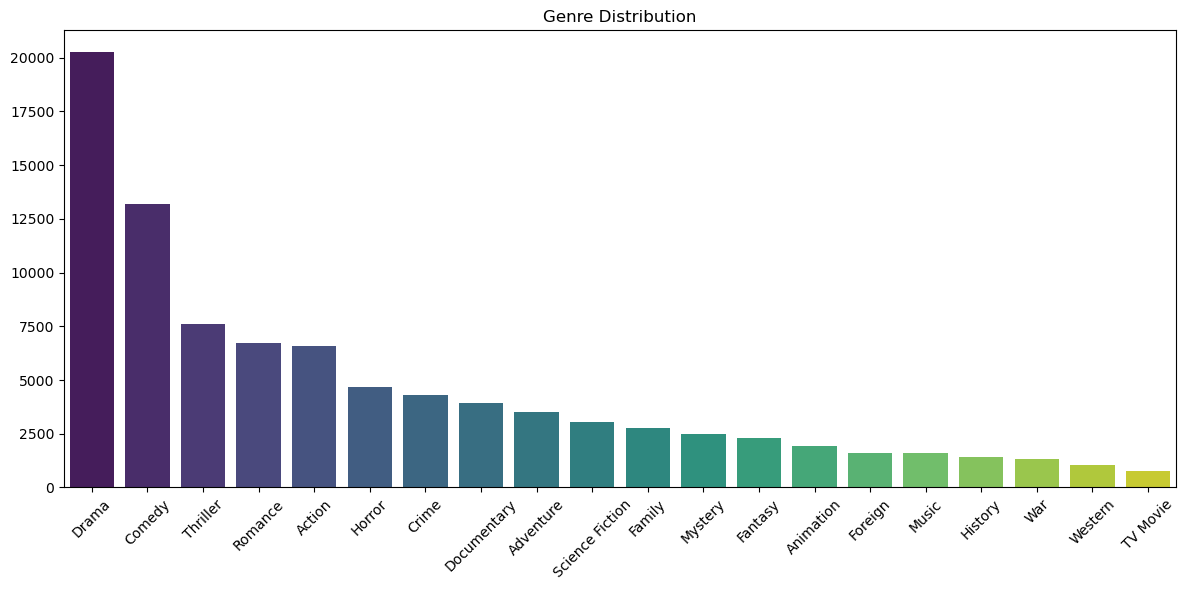

In [43]:
genre_count=movies['genre_list'].explode().value_counts().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=genre_count.index,y=genre_count.values,palette='viridis',legend=False)
plt.title('Genre Distribution')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [46]:
## string into binary numerical columns

In [61]:
scaler=MinMaxScaler()
scaled_features=scaler.fit_transform(movies[['vote_average','popularity']])
scaled_data=pd.DataFrame(scaled_features)
print(scaled_data)

          0         1
0      0.77  0.040087
1      0.69  0.031079
2      0.65  0.021394
3      0.61  0.007049
4      0.57  0.015320
...     ...       ...
45455  0.40  0.000132
45456  0.90  0.000326
45457  0.38  0.001649
45458  0.00  0.000006
45459  0.00  0.000298

[45460 rows x 2 columns]


In [51]:
mlb=MultiLabelBinarizer()
genre_encoded=mlb.fit_transform(movies['genre_list'])
genre_data=pd.DataFrame(genre_encoded,columns=mlb.classes)

In [52]:
print(genre_data)

       0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0       0   0   1   1   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
1       0   1   0   0   0   0   0   1   1   0   0   0   0   0   0   0   0   0   
2       0   0   0   1   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
3       0   0   0   1   0   0   1   0   0   0   0   0   0   0   1   0   0   0   
4       0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
45455   0   0   0   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   
45456   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
45457   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   1   
45458   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
45459   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

       18  19  
0       0  

In [53]:
## final features

In [64]:
final_features=pd.concat([genre_data,scaled_data],axis=1)
print(final_features)

       0   1   2   3   4   5   6   7   8   9   ...  12  13  14  15  16  17  \
0       0   0   1   1   0   0   0   1   0   0  ...   0   0   0   0   0   0   
1       0   1   0   0   0   0   0   1   1   0  ...   0   0   0   0   0   0   
2       0   0   0   1   0   0   0   0   0   0  ...   0   0   1   0   0   0   
3       0   0   0   1   0   0   1   0   0   0  ...   0   0   1   0   0   0   
4       0   0   0   1   0   0   0   0   0   0  ...   0   0   0   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
45455   0   0   0   0   0   0   1   1   0   0  ...   0   0   0   0   0   0   
45456   0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   
45457   1   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   1   
45458   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
45459   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   

       18  19    0         1   
0       0   0  0.77  0.040087  

In [55]:
# decomposition means range 

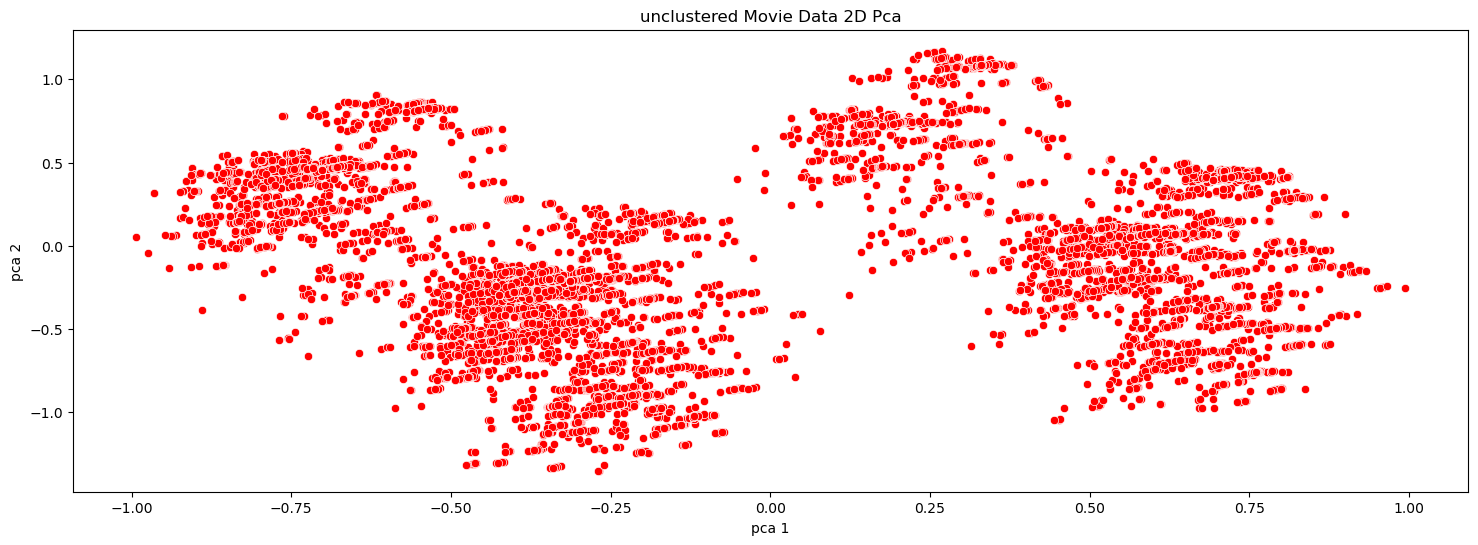

In [66]:
pca=PCA(n_components=2)
reduced_features=pca.fit_transform(final_features)
plt.figure(figsize=(18,6))
sns.scatterplot(x=reduced_features[:,0],y=reduced_features[:,1],color='red')
plt.title('unclustered Movie Data 2D Pca')
plt.xlabel('pca 1')
plt.ylabel('pca 2')
plt.show()

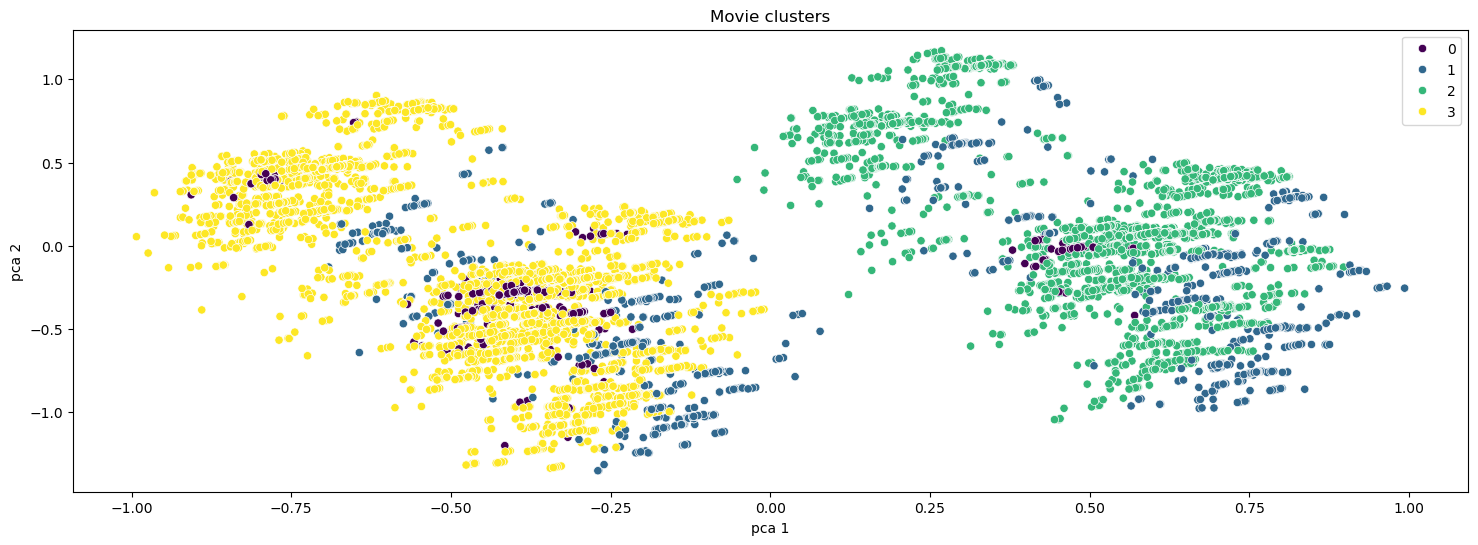

In [67]:
pca=PCA(n_components=2)
reduced_features=pca.fit_transform(final_features)
kmeans=KMeans(n_clusters=4,random_state=42)
clusters=kmeans.fit_predict(final_features)
plt.figure(figsize=(18,6))
sns.scatterplot(x=reduced_features[:,0],y=reduced_features[:,1],hue=clusters,palette='viridis')
plt.title('Movie clusters')
plt.xlabel('pca 1')
plt.ylabel('pca 2')
plt.show()

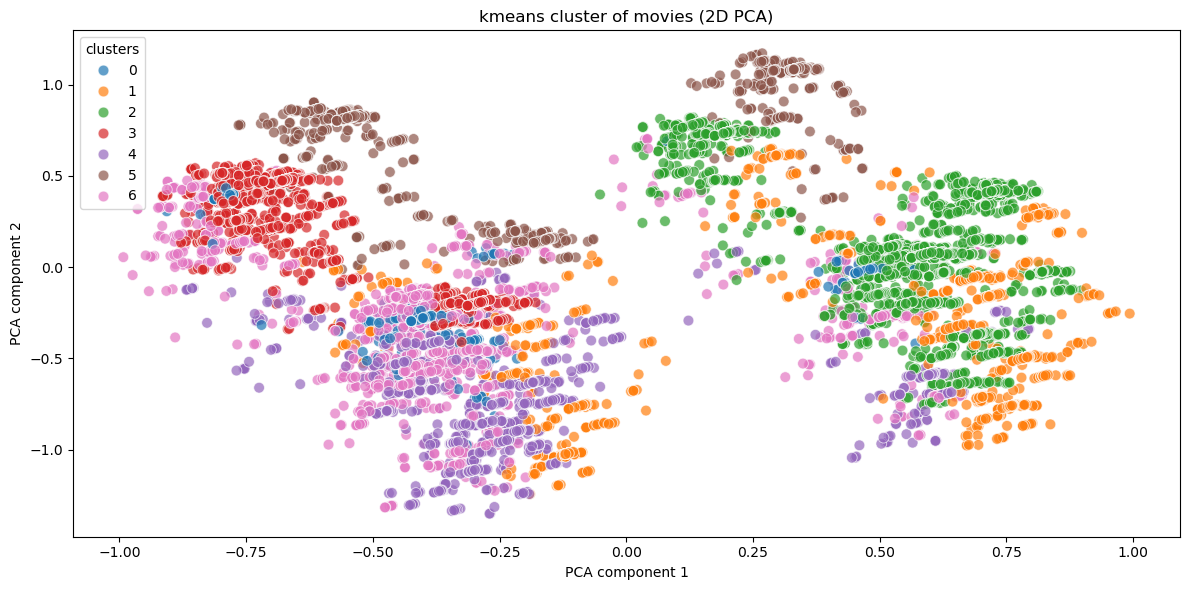

In [78]:
## tuning k means
optimal_k=7
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
movies['cluster']=kmeans.fit_predict(final_features)
#plot
plt.figure(figsize=(12,6))
sns.scatterplot(x=reduced_features[:,0],y=reduced_features[:,1],hue=movies['cluster'],palette='tab10',s=60,alpha=0.7)
plt.title('kmeans cluster of movies (2D PCA)')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.legend(title='clusters',loc='upper left')
plt.tight_layout()
plt.show()

    

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7828\1960165152.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=movies['cluster'],palette='tab10',alpha=0.7)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7828\1960165152.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='clusters',loc='upper left')


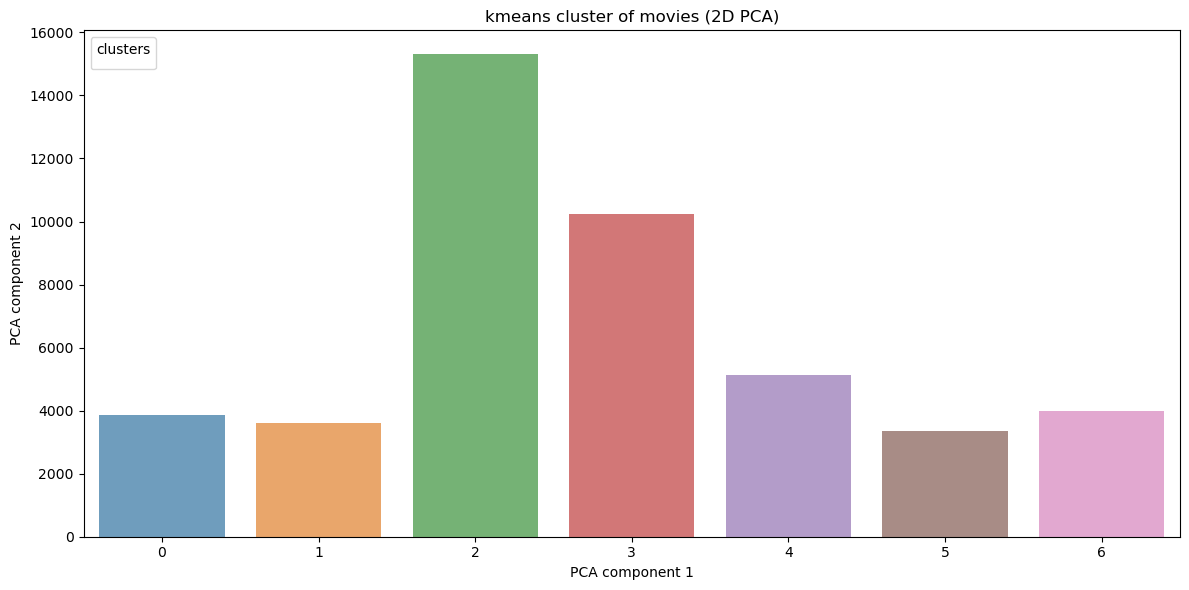

In [82]:
# tuning k means
optimal_k=7
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
movies['cluster']=kmeans.fit_predict(final_features)
#plot
plt.figure(figsize=(12,6))
sns.countplot(x=movies['cluster'],palette='tab10',alpha=0.7)
plt.title('kmeans cluster of movies (2D PCA)')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.legend(title='clusters',loc='upper left')
plt.tight_layout()
plt.show()

In [87]:
def recommended_movies(movie_title,n=5):
    target=movies[movies['title'].str.lower()==movie_title.lower()]
    if target.empty:
        return f"movie titled'{movie_title}'not found in dataset"
    cluster_id=target['cluster'].values[0]
    similar_movies=movies[(movies['cluster']==cluster_id)&(movies['title'].str.lower()!=movie_title.lower())]
    return similar_movies[['title','vote_average','popularity']].sort_values(by=['vote_average','popularity'],ascending=False).head(n)

In [88]:
print("recommendded movies similar to 'Sabrina':")
print(recommended_movies('Sabrina',n=10))

recommendded movies similar to 'Sabrina':
                               title  vote_average popularity
27295                 The Little Hut          10.0   0.883862
27628                Vessel of Wrath          10.0   0.657391
41036             A Kiss at Midnight          10.0   0.631015
20802        The Taming of the Shrew          10.0   0.329193
16681  The Misadventures of Margaret          10.0   0.196886
41709                   The Bachelor          10.0   0.187552
24214      Looking for Maria Sanchez          10.0   0.122935
31082                      Time Pass          10.0   0.110029
21490              A Ticklish Affair          10.0   0.096838
12164        Chilly Scenes of Winter          10.0   0.009192


In [89]:
print("recommendded movies similar to 'Toy story':")
print(recommended_movies('Toy Story',n=10))

recommendded movies similar to 'Toy story':
                                               title  vote_average popularity
45371          LEGO DC Super Hero Girls: Brain Drain          10.0   8.413734
36400                                Mad at the Moon          10.0   1.225055
30288                                  Backyard Dogs          10.0     0.9854
43473                                        Firefly          10.0   0.957019
2653                                Stiff Upper Lips          10.0   0.882132
21408                                  Growing Pains          10.0   0.853913
42612                 Stephen Lynch: Hello Kalamazoo          10.0   0.724499
42731  Christopher Titus: Angry Pursuit of Happiness          10.0   0.671568
10456                                     Li'l Abner          10.0   0.611118
25787                George Lopez: America's Mexican          10.0   0.534723
